## Model the NPR articles with Latent Dirichlet Allocation

  1. Run the LDA model with sklearn (http://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation)
  2. Visualize it with pyldavis (https://pyldavis.readthedocs.io/en/latest)

In [44]:
# USE Python3
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/IPython/.*')

import pyLDAvis
import pyLDAvis.sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

pyLDAvis.enable_notebook()

df = pd.read_csv('npr_articles.csv', parse_dates=['date_published'])
text = df['processed_text'].values.tolist()

## Vectorize the words

Essentially create a numeric representation of the words based on frequencies

In [47]:
max_features = 1000
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=max_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(text)
print("ready")

ready


## Run LDA

In [58]:
n_topics = 6
lda_model = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                      learning_method='online',
                                      learning_offset=50.,
                                      random_state=0)

lda_model.fit(tf)
pyLDAvis.sklearn.prepare(lda_model,tf, tf_vectorizer, R=20)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      23.210780        1       1 -0.162169  0.046023
5      22.767971        1       2 -0.003009 -0.069465
1      18.193907        1       3 -0.084117  0.027974
4      15.923625        1       4  0.141149  0.003287
0      11.188261        1       5 -0.002396 -0.088613
2       8.715455        1       6  0.110543  0.080794, topic_info=     Category          Freq         Term         Total  loglift  logprob
term                                                                    
937   Default   2570.000000        trump   2570.000000  20.0000  20.0000
669   Default   2196.000000    president   2196.000000  19.0000  19.0000
592   Default   3087.000000          npr   3087.000000  18.0000  18.0000
780   Default  10259.000000          say  10259.000000  17.0000  17.0000
571   Default    806.000000        music    806.000000  16.0000  16.0000
595   Default    905.000000        obama    905.000000  15.0000  15.0000
865   Default   1177.000000        story   1177.000000  14.0000  14.0000
741   Default   1698.000000       report   1698.000000  13.0000  13.0000
281   Default    810.000000        elect    810.000000  12.0000  12.0000
839   Default    612.000000         song    612.000000  11.0000  11.0000
193   Default   2086.000000    copyright   2086.000000  10.0000  10.0000
650   Default    577.000000       police    577.000000   9.0000   9.0000
356   Default    560.000000         food    560.000000   8.0000   8.0000
783   Default    908.000000       school    908.000000   7.0000   7.0000
951   Default   1716.000000          use   1716.000000   6.0000   6.0000
168   Default    846.000000      company    846.000000   5.0000   5.0000
282   Default    741.000000     election    741.000000   4.0000   4.0000
525   Default   3124.000000         make   3124.000000   3.0000   3.0000
982   Default    515.000000        white    515.000000   2.0000   2.0000
774   Default    611.000000       russia    611.000000   1.0000   1.0000
914    Topic1    151.806789    tillerson    153.726005   1.4480  -6.1838
3      Topic1    102.217614     abortion    103.664101   1.4465  -6.5793
237    Topic1    325.685181    democrats    330.349679   1.4463  -5.4205
698    Topic1    142.138408        putin    144.205407   1.4461  -6.2496
739    Topic1    269.769988       repeal    274.037204   1.4449  -5.6088
797    Topic1    320.839821       senate    325.990692   1.4446  -5.4355
745    Topic1    369.711195  republicans    375.893341   1.4440  -5.2937
937    Topic1   2524.821115        trump   2570.365570   1.4427  -3.3725
384    Topic1    109.932621          gop    111.937885   1.4425  -6.5065
596    Topic1    188.254689    obamacare    192.462874   1.4384  -5.9686
...       ...           ...          ...           ...      ...      ...
142    Topic6    196.147462    christmas    269.330643   2.1230  -4.9480
591    Topic6    201.037644     now8216s    280.198841   2.1081  -4.9234
934    Topic6    121.035068         tree    170.792802   2.0957  -5.4308
265    Topic6     79.990793        drink    125.685016   1.9882  -5.8450
416    Topic6    129.557509      holiday    212.121380   1.9470  -5.3628
982    Topic6    311.186473        white    515.645029   1.9350  -4.4865
756    Topic6     95.998703   restaurant    160.087171   1.9287  -5.6625
789    Topic6     92.686644       season    157.090578   1.9125  -5.6977
926    Topic6     85.940249    tradition    148.850460   1.8908  -5.7732
429    Topic6     69.286263          ice    121.196165   1.8809  -5.9886
356    Topic6    305.204758         food    560.287341   1.8326  -4.5059
0      Topic6    115.419429         8212    208.584122   1.8483  -5.4783
865    Topic6    468.436631        story   1177.730263   1.5181  -4.0775
422    Topic6    126.877786         host    234.755850   1.8248  -5.3837
592    Topic6    813.401059          npr   3087.630208   1.1061  -3.5257
193    Topic6    507.

In [45]:
## create a matrix of the top words used to define each topic
top_words = 15
tf_feature_names = tf_vectorizer.get_feature_names() 
print_top_words(lda_model,tf_feature_names,top_words)
top_words = get_top_words(lda_model,tf_feature_names,top_words)
all_top_words = set().union(*[v for v in top_words.values()])

for key,vals in top_words.items():
    print(key," ".join(vals))
print(all_top_words)
print("total words: %s"%len(all_top_words))

Topic #0:
say use company make new time npr just human change work science scientist copyright way
Topic #1:
say report people npr city police state tell case government accord use attack officer law
Topic #2:
npr copyright make story white food write new time year now8216s book christmas say black
Topic #3:
trump say president obama elect npr election state russia donald_trump campaign make vote administration country
Topic #4:
music make just say song time come know love play npr copyright way life thing
Topic #5:
say people think work school know make just time child student way come help study

0 say use company make new time npr just human change work science scientist copyright way
5 say people think work school know make just time child student way come help study
3 trump say president obama elect npr election state russia donald_trump campaign make vote administration country
2 npr copyright make story white food write new time year now8216s book christmas say black
4 music mak

In [42]:
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        _top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words[str(topic_idx)] = _top_words
    return(top_words)

In [63]:
topic_probas = np.zeros((max_features,n_topics),)
for topic_idx, topic in enumerate(lda_model.components_):
    topic_probas[:,topic_idx] = topic
print(topic_probas.shape)

token_probas = lda_model.transform(tf)
print(token_probas.shape)
print(tf.shape)

(1000, 6)
<class 'numpy.ndarray'>
(2275, 6)
(2275, 1000)


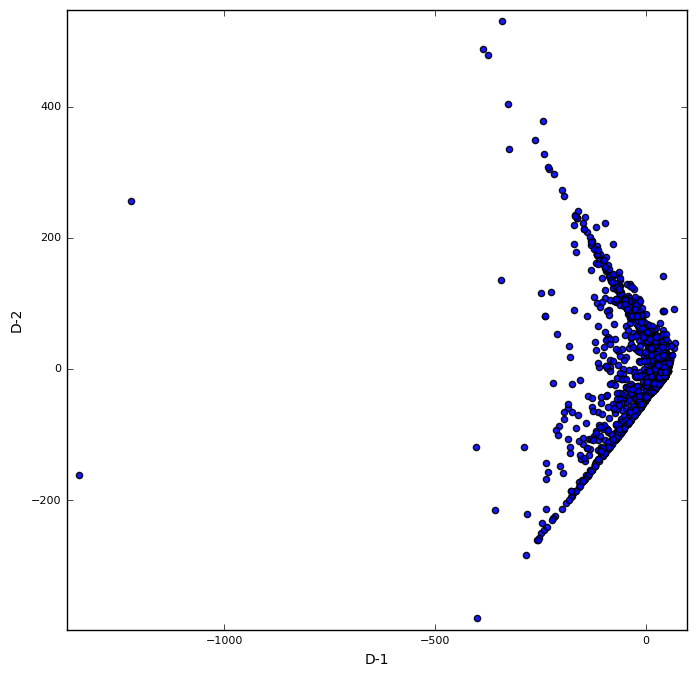

In [75]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt

def make_scatter(fit,ax,pcX=0,pcY=1,font_size=10,font_name='sans serif',ms=20,leg=True,title=None):
    colors = ['k','cyan','r','orange','g','b','magenta']
    #cvNames = np.sort(np.unique(covs[covariate]))
    lines = []
    #for _i,i in enumerate(cvNames):
    #    indices = np.where(covs[covariate]==i)[0]
    #    s = ax.scatter(fit[indices,pcX],fit[indices,pcY],c=colors[_i],s=ms,label=covariate,alpha=0.9)
    #    lines.append(s)
    indices = np.arange(fit.shape[0])
    s = ax.scatter(fit[indices,pcX],fit[indices,pcY],s=ms,alpha=0.9)
    lines.append(s)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(font_size-2)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(font_size-2)

    buff = 0.02
    bufferX = buff * (fit[:,pcX].max() - fit[:,pcX].min())
    bufferY = buff * (fit[:,pcY].max() - fit[:,pcY].min())
    ax.set_xlim([fit[:,pcX].min()-bufferX,fit[:,pcX].max()+bufferX])
    ax.set_ylim([fit[:,pcY].min()-bufferY,fit[:,pcY].max()+bufferY])
    ax.set_xlabel("D-%s"%str(pcX+1),fontsize=font_size,fontname=font_name)
    ax.set_ylabel("D-%s"%str(pcY+1),fontsize=font_size,fontname=font_name)
    plt.locator_params(axis='x',nbins=5)
    ax.set_aspect(1./ax.get_data_ratio())
         
    if title:
        ax.set_title(title,fontsize=font_size+2,fontname=font_name)
    #if leg:
    #    legend = ax.legend(lines,cvNames,loc='upper right',scatterpoints=1,
    #                       handletextpad=0.01,labelspacing=0.01,borderpad=0.1,handlelength=1.0)
    #
    #    for label in legend.get_texts():
    #        label.set_fontsize(font_size-2)
    #        label.set_fontname(font_name)


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

mat = token_probas
matScaled = preprocessing.scale(mat)
pca_fit = PCA(n_components=2).fit_transform(mat)

make_scatter(pca_fit,ax)
plt.show()